In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Least-Square Regression
+ Write a function that computes the pseudo-inverse of a matrix $X$ 

(Hint: you can use the `np.linalg.inv` function)

$X^+ = (X^T \cdot X)^{-1} \cdot X^T$


In [3]:
def pseudo_inverse(X):
    # Write your code

+ Write a function that computes the Least-Square coefficients vector $c$ given a matrix $X$ and a vector $y$

     $c = X^+ \cdot y$
     
 
+ Write a function that computes the Least-Square coefficients vector $c$ given a matrix $X$ and a vector $y$ using the SVD decomposition $X = U\cdot \Sigma \cdot V^T$
 
    (Hint: you can use the `np.linalg.svd` function)

    $c=V \cdot \Sigma^{-1} \cdot U^* \cdot y$

In [4]:
def least_square_coefficients(X,y):
    # Write your code

In [5]:
def least_square_coefficients_svd(X,y):
    # Write your code

## Toy dataset
+ Generate a toy dataset $x$ and $y$ s.t.:
    + $x = (0,0.001,0.002, ..., 1)$ (hint: use the `np.arange` function)
    + $y = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + r$ with:
        + $c_0 = 2$ 
        + $c_1 = 20$
        + $c_2 = 100$ 
        + $c_3 = 100$
        + $r \sim \mathcal{N}(0,10)$ (hint: use the `np.random.randn` function)
    + Generate $X = [x^0 | x^1 | x^2 | \dots | x^k]$ the truncated Vandermonde matrix (for $k$=3) (hint: use the `np.linalg.vander` function)

In [6]:
x = np.arange(#write your code) 
y = #write your code
X = np.vander(#write your code)

+ Compute the least square vector $c$ with each one of the previous functions
+ Compute $\hat{y} = X^+ \cdot c$ the least-square model with each vector $c$
+ Plot $y = f(\hat{y})$ for each method
+ Test the same experiment for a Vandermonde matrix with $k=30$

In [7]:
c = least_square_coefficients(X,y)
c_svd = least_square_coefficients_svd(X,y)

y_hat = #write your code
y_hat_svd = #write your code


Text(0, 0.5, '$\\hat{y}$ (pseudo-inverse)')

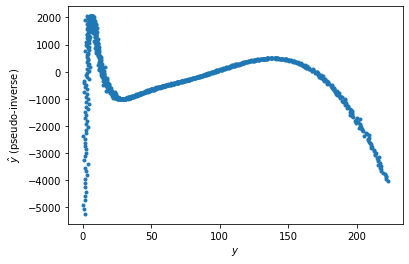

In [8]:
plt.plot(y,y_hat,".",label="Pseudo-Inverse")
plt.xlabel("$y$")
plt.ylabel("$\hat{y}$ (pseudo-inverse)")

Text(0, 0.5, '$\\hat{y}$ (SVD method)')

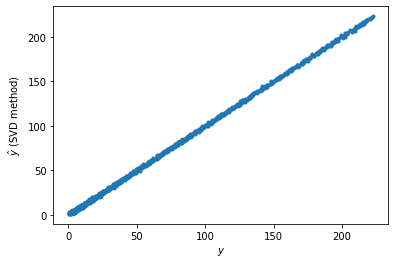

In [9]:
plt.plot(y,y_hat_svd,".",label="SVD")
plt.xlabel("$y$")
plt.ylabel("$\hat{y}$ (SVD method)")

+ Compute the runtimes for each method that aims at computing $c$

In [10]:
%timeit least_square_coefficients(X,y)


135 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit least_square_coefficients_svd(X,y)

1.13 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit np.linalg.svd(X, full_matrices=False)

1.05 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Transcription Factors gene expression

## Load dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

+ Load the "TFs_gene_expression_normalized.csv" dataset, as a matrix $X$, using the `pd.read_csv` function.

Each row represents a condition (groups of cells from a given tissues from different patients), and each column represents a gene encoding a transcription factor, and the value $X_{i,j}$ at row $i$ and column $j$ is simply the gene expression of gene $j$ in condition $i$

In [14]:
X = pd.read_csv("TFs_gene_expression_normalized.csv",index_col=0)
print(X.shape)
X.head()


(10000, 500)


,ZBTB7A,ZNF248,GTF2IRD2,CENPB,ZNF705G,MYCL,HNF4G,ZNF440,ADNP2,PAX5,...,TFE3,PBX4,GMEB1,FOXI3,ZNF704,ZNF773,NFKB1,ZBTB47,SPIB,MYB
GTEX-1F6RS-0226-SM-9MQKO,0.75,0.55,0.65,0.63,0.44,-0.79,-0.41,0.43,0.51,-0.27,...,1.47,0.53,1.14,-0.29,0.68,0.74,1.01,0.58,-0.48,-0.27
GTEX-1269C-2826-SM-5EQ5O,0.58,0.63,0.02,-0.49,-0.25,-0.83,-0.45,-1.12,0.17,-0.32,...,0.62,-1.03,-0.29,-0.29,1.59,-1.33,0.37,0.53,-0.32,-0.73
GTEX-14LZ3-0011-R1a-SM-69LP5,-0.90,-0.63,-1.09,0.62,1.62,-0.59,-0.40,-1.47,-1.68,-0.32,...,-2.24,-0.94,-1.91,-0.29,-0.20,-1.80,-1.67,0.47,-0.50,-0.72
GTEX-17HG3-2926-SM-79ON8,1.23,0.48,-0.94,-0.13,-0.25,-0.42,-0.14,-0.45,-0.49,-0.26,...,-0.06,-0.17,-0.98,0.08,0.10,-0.31,-1.57,0.63,-0.49,-0.49
GTEX-147F3-0726-SM-5NQ9U,-0.22,-0.42,0.31,0.61,-0.25,0.40,-0.37,0.88,0.86,-0.03,...,0.29,1.07,0.39,-0.29,0.69,0.41,0.21,-0.18,-0.30,0.13


+ In this work we will extract one of the gene expression vectors from a transcription (for example 'ZBTB7A', the so-called "pokemon") to form an observations vector $y$, and we will try to model its expression as a linear combination of the expression levels of other transcription factors in matrix $X$.

In [15]:
y = X["ZBTB7A"]
del X["ZBTB7A"]


In [16]:
X = X.values
y = y.values

+ Select randomly:
    + A fraction $\delta$ of the rows as training dataset to infer the coefficients
    + The remaining fraction $1-\delta$  of the rows as test set to compute the prediction error
    
Hint: use the `np.random.shuffle` function to shuffle a list containing the indexes of rows in $X$, and then simply take the first $2/3$ (respectively the last $1/3$) of this vector to build the training set (respectively the test set).

In [70]:
index = list(range(X.shape[0]))
np.random.shuffle(#write your code)

In [71]:
L = len(index)
delta = 2/3

y_train = y[#write your code]
y_test = y[#write your code]

X_train = X[#write your code]
X_test = X[#write your code]

In [72]:
X_test.shape,X_train.shape,X.shape

((9900, 499), (100, 499), (10000, 499))

## Linear Regression 


+ Compute the linear least-square coefficients for the training set 

In [85]:
c = least_square_coefficients(X_train, y_train)

+ Compute the predictions on the training and test sets and plot them with respect to the real observations

Text(0, 0.5, '$\\hat{y}$')

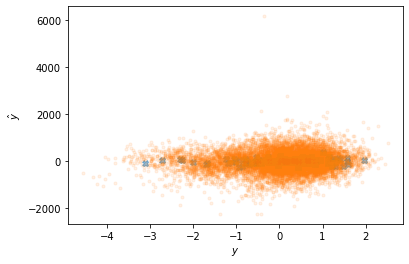

In [86]:
y_test_pred = #write your code
y_train_pred = #write your code

plt.plot(y_train, y_train_pred,"X",alpha=0.5)
plt.plot(y_test,y_test_pred,'.',alpha=0.1)

plt.xlabel("$y$")
plt.ylabel("$\hat{y}$")


Make a function that returns the prediction error: $||X_{test}\cdot c− y_{test}||_2^2$

In [87]:
def error(X,y,c):
   #write your code

In [88]:
error(X_test,y_test,c),error(X_train,y_train,c)

(1981580186.1673427, 1043741.6899341312)

+ Plot the distribution of coefficients

(array([  8.,  14.,  40., 333.,  76.,  21.,   3.,   1.,   2.,   1.]),
 array([-215.30128387, -156.89014096,  -98.47899805,  -40.06785513,
          18.34328778,   76.75443069,  135.16557361,  193.57671652,
         251.98785944,  310.39900235,  368.81014526]),
 <BarContainer object of 10 artists>)

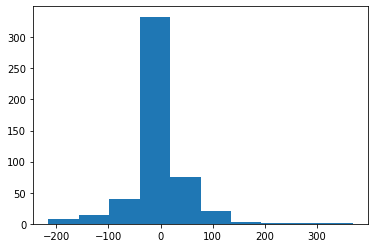

In [89]:
plt.hist(c)

## Tikhonov regularization (ridge regression)


In some real world cases, solving the least square linear regression problem by minimizing the residuals squared norm $Argmin_c || Xc - y ||^2_2$, may lead to undesirable solutions due to a tendency of amplifying noise.
In this context, a regularization term can be included in the to give preference to a particular solution with desirable properties.

$$Argmin_c || Xc - y ||^2_2 + ||\Gamma c||^2_2$$

Here $\Gamma$ is called the Tikhonov regularization matrix (often $\Gamma = \alpha I$).

+ Calculate the analytical solution for $c$


+ Replace the matrix $X$ by its SVD and compute the previous analytical solution

+ Make a function that receives as an input observations $y_{train}$ and conditions $X_{train}$ and compute the coefficients $c$ that minimizes

$$||X_{train}\cdot c - y_{train}||_2^2 + ||\alpha c||_2^2$$

In [90]:
def regression_tikhonov(X, y, alpha):
    #write your code
    
def regression_tikhonov_svd(X, y, alpha):
    #write your code

+ Run the previous study using the Tikhonov regularization for different values of $\alpha$

In [91]:
c = regression_tikhonov(X_train, y_train, alpha=10)

Text(0, 0.5, '$\\hat{y}$')

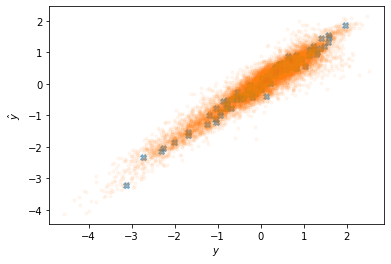

In [92]:
y_train_pred = #write your code
y_test_pred = #write your code
plt.plot(y_train, y_train_pred,"X",alpha=0.5)
plt.plot(y_test, y_test_pred,".",alpha=0.05)
plt.xlabel("$y$")
plt.ylabel("$\hat{y}$")

In [93]:
error(X_test,y_test,c),error(X_train,y_train,c)

(966.6567043413049, 2.643525054340168)

+ Plot the distribution of coefficients

(array([  1.,   2.,  13.,  64., 119., 145.,  94.,  43.,  11.,   7.]),
 array([-0.03475338, -0.0278782 , -0.02100302, -0.01412784, -0.00725266,
        -0.00037748,  0.0064977 ,  0.01337288,  0.02024806,  0.02712324,
         0.03399842]),
 <BarContainer object of 10 artists>)

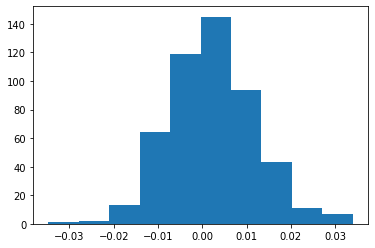

In [94]:
plt.hist(c)

+ In which case does the classic least-squares linear regression fail?



+ Does Tikhonov regularization solves this problem?


+ Set a value $\delta$ that would illustrate this phenomenon


## Bonus: Lasso Regression
+ Read about Lasso Regression, and explain how coefficients $c$ are computed
+ Test `scikit-learn` python library Lasso Regression implementation